In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
def convert(value):
    if value == 1:
        return "yes"
    else:
        return "no"

    df["SeniorCitizen"] = df["SeniorCitizen"].apply(convert)

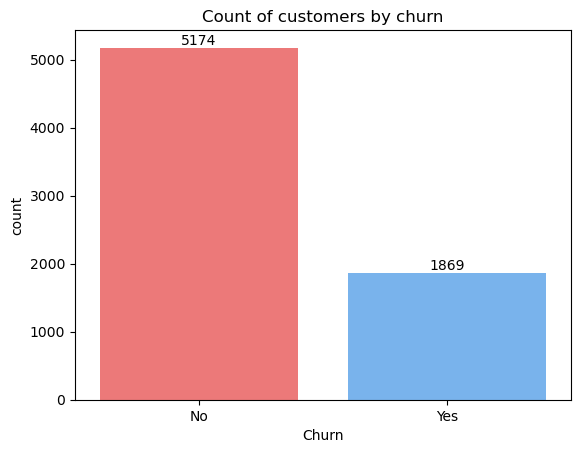

In [60]:
count = sns.countplot(x="Churn", data=df, palette=["#ff6666", "#66b3ff"])
count.bar_label(count.containers[0])
plt.title("Count of customers by churn")
plt.show()

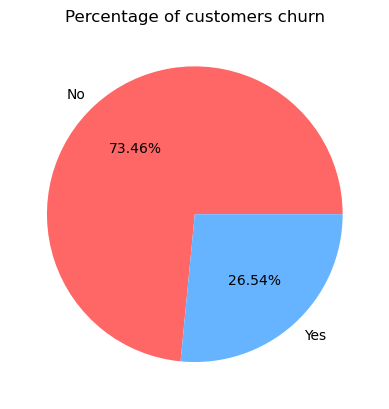

In [61]:
groupData = df.groupby("Churn").agg({"Churn": "count"})
plt.pie(groupData["Churn"], labels=groupData.index, autopct="%1.2f%%", colors=["#ff6666", "#66b3ff"])
plt.title("Percentage of customers churn")
plt.show()


In [26]:
#Inference: From the above, we can conclude that 26.54% of customers have churned out.

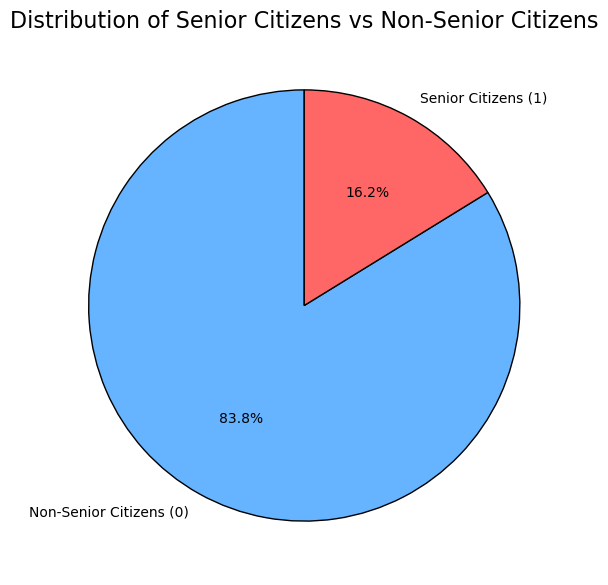

In [42]:
senior_counts = df['SeniorCitizen'].value_counts()
labels = ['Non-Senior Citizens (0)', 'Senior Citizens (1)']
sizes = senior_counts
colors = ['#66b3ff', '#ff6666']
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Senior Citizens vs Non-Senior Citizens', fontsize=16)
plt.show()


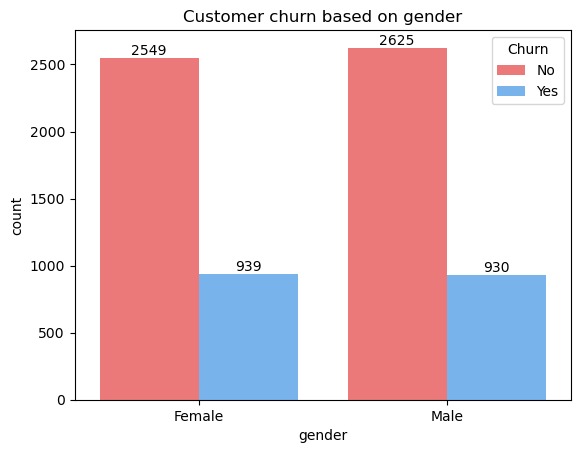

In [62]:
count = sns.countplot(x="gender", data=df, hue="Churn", palette=["#ff6666", "#66b3ff"])
plt.title("Customer churn based on gender")
count.bar_label(count.containers[0])
count.bar_label(count.containers[1])
plt.show()


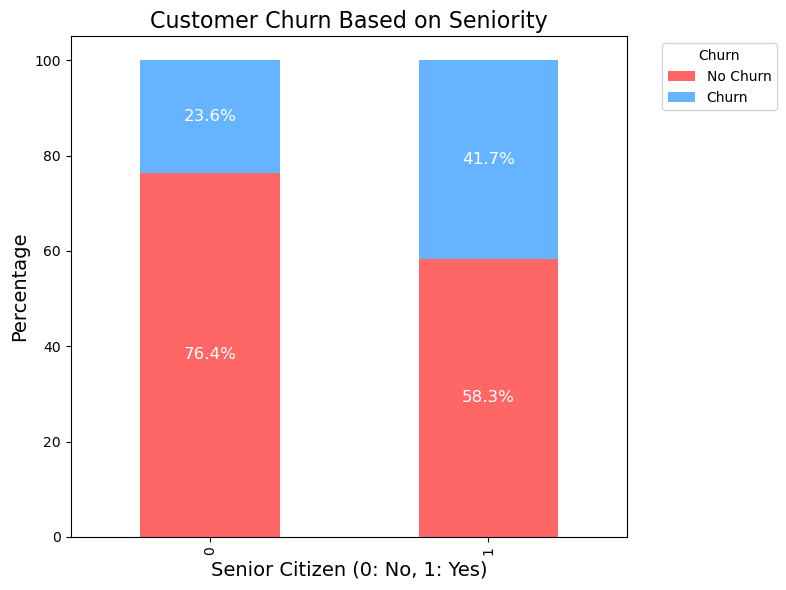

In [40]:
import pandas as pd
import matplotlib.pyplot as plt


churn_percentage = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)
churn_percentage = churn_percentage.div(churn_percentage.sum(axis=1), axis=0) * 100  # Normalize to percentage

ax = churn_percentage.plot(kind='bar', stacked=True, figsize=(8, 6), color=["#ff6666", "#66b3ff"])


ax.set_title('Customer Churn Based on Seniority', fontsize=16)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_xlabel('Senior Citizen (0: No, 1: Yes)', fontsize=14)
ax.legend(title="Churn", labels=["No Churn", "Churn"], bbox_to_anchor=(1.05, 1), loc='upper left')


for p in ax.patches:
    height = p.get_height() 
    width = p.get_width()    
    x = p.get_x() + width / 2  
    y = p.get_y() + height / 2  
    
    
    ax.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=12, color='white')

plt.tight_layout()
plt.show()


In [44]:
# Inference: Comparatively a greater % of people in senior citizen category have churned out

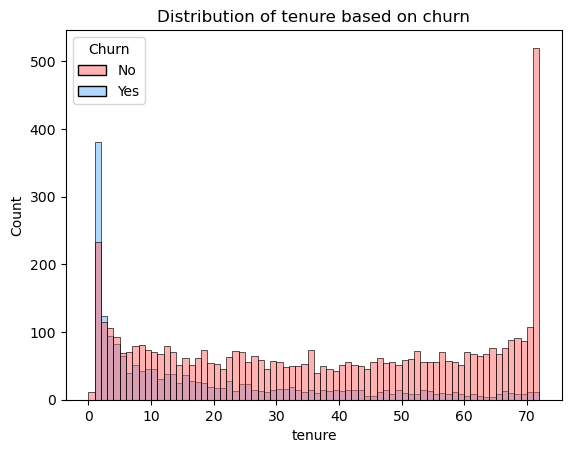

In [63]:
sns.histplot(x="tenure", data=df, bins=72, hue="Churn", palette=["#ff6666", "#66b3ff"])
plt.title("Distribution of tenure based on churn")
plt.show()


In [52]:
# Inference: Long term users have stayed but people who have consumed services for shorter periods have churned out

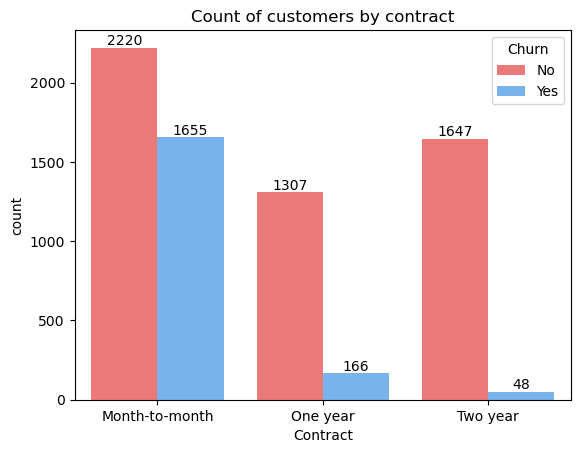

In [64]:
plot = sns.countplot(x="Contract", data=df, hue="Churn", palette=["#ff6666", "#66b3ff"])
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.title("Count of customers by contract")
plt.show()


In [54]:
# Inference: it is visible that people who have month to month contract are likely to churn from those who have yearly contracts

In [55]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

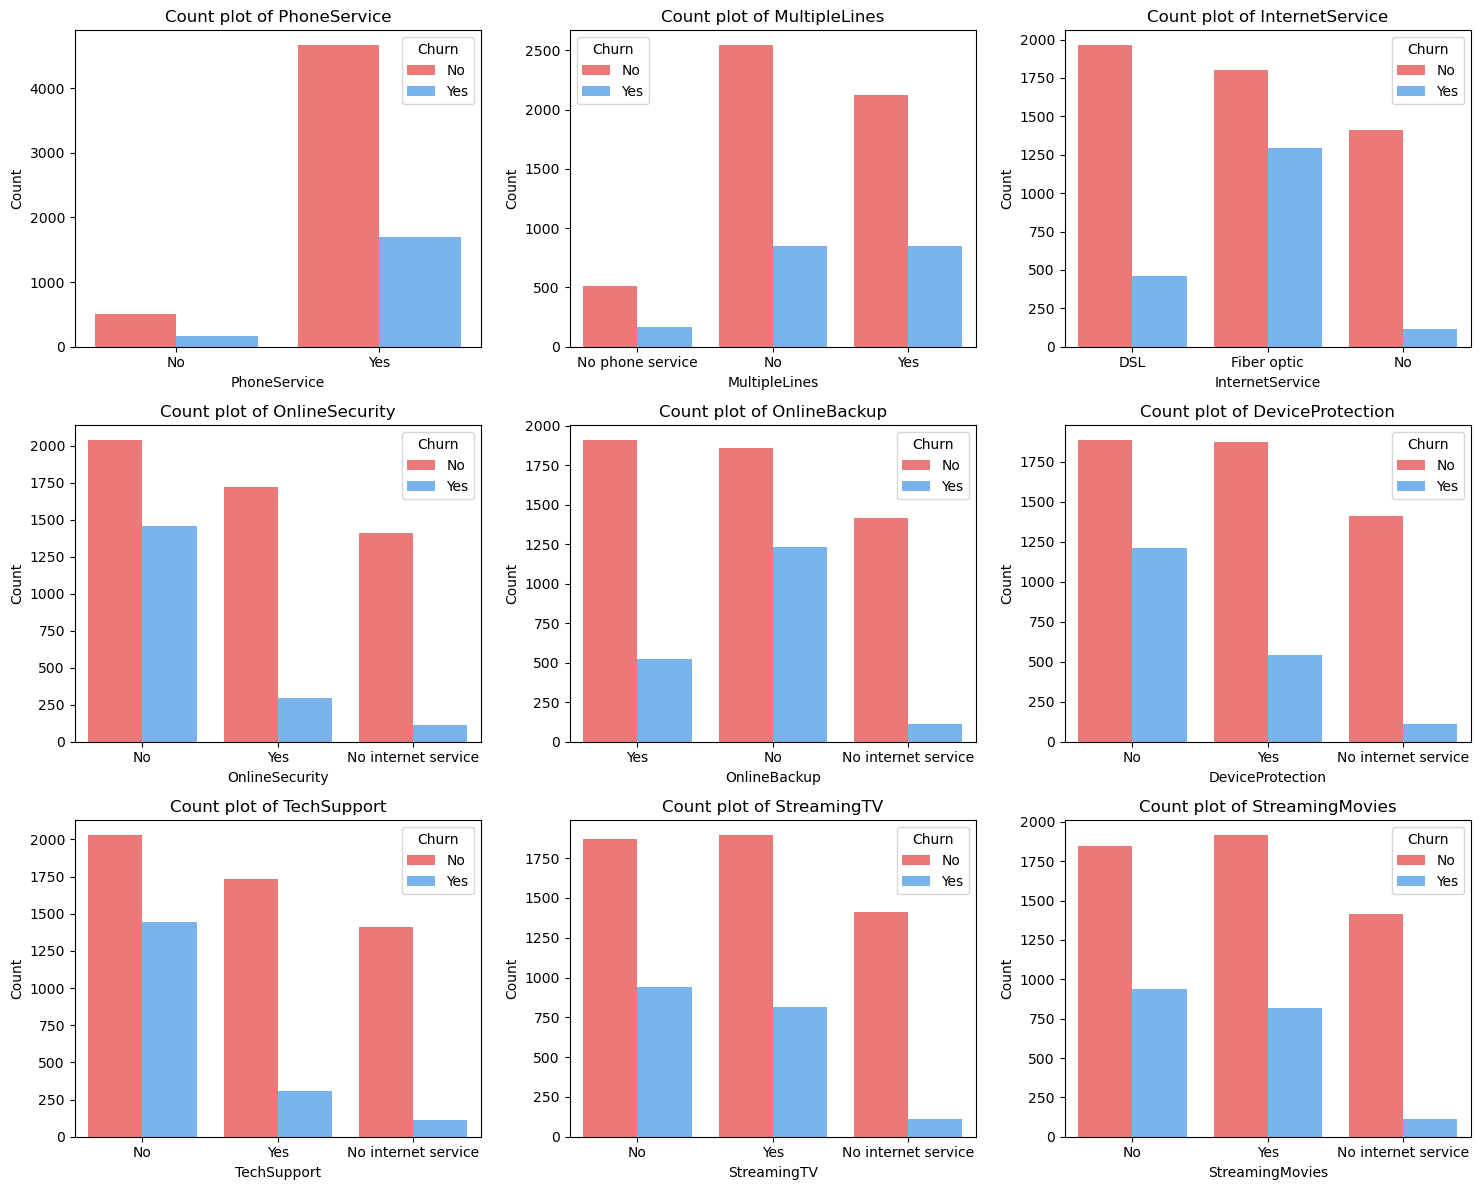

In [65]:
columns = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
           "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue="Churn", palette=["#ff6666", "#66b3ff"])
    axes[i].set_title(f"Count plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [57]:
# Inference: The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable

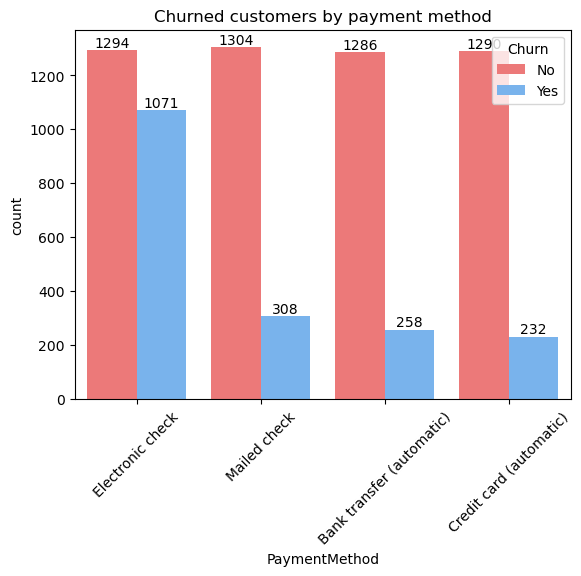

In [66]:
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn", palette=["#ff6666", "#66b3ff"])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned customers by payment method")
plt.xticks(rotation=45)
plt.show()


In [59]:
# Inference: customer is likely to churn when he is using electronic check as a payment method